In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Tree Question 1

In [87]:
election = pd.read_csv("/Users/brandonk87/Downloads/MSC 641/Tree Methods/election2000-1.csv")
election.head()

,Bush,UnE,Pop,Male,Male18,Pop65,NonMet,Pov,NuHouse,Inc50,Inc75,Inc100
0,56.47,4.6,4447100,48.27,47.26,13.0,32.68,16.1,1472906,14.3,4.3,2.0
1,58.62,6.6,626932,51.69,51.83,5.7,58.48,9.4,85359,36.3,16.8,6.9
2,51.02,3.9,5130632,49.92,49.42,13.0,14.03,13.9,1571330,11.0,4.2,1.8
3,51.31,4.4,2673400,48.80,47.94,14.0,53.66,15.8,836388,10.0,2.9,1.6
4,41.65,4.9,33871648,49.82,49.26,10.6,3.31,14.2,9709296,23.1,10.0,4.4


In [88]:
from sklearn.model_selection import train_test_split
y = election[["Bush"]]
x = election.iloc[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 13)

# Question 2

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text, plot_tree
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor(random_state=13)
# Defining the decision tree function
tree.fit(x_train, y_train)
# Applying function to train data

pred_train = tree.predict(x_train)
print("Train MSE:",mean_squared_error(pred_train,y_train))
# Making predictions on train data

pred_test = tree.predict(x_test)
print("Test MSE:",mean_squared_error(pred_test,y_test))
# Making predictions on test data

Train MSE: 0.0
Test MSE: 60.65663636363636


# Question 3

In [90]:
from sklearn.model_selection import KFold, cross_val_score

tree_prune = DecisionTreeRegressor(random_state=13)
# Define the function
path = tree_prune.cost_complexity_pruning_path(x_train,y_train)
# this gives only the first alpha values for each batch of alphas
## (where the RSS does not changing within each batch)
# You want the lower part of each batch becuase you want smallest penalty
alphas, impurities = path.ccp_alphas, path.impurities
# Defining the alpha values

cv_score = []
for i in alphas:
    tree = DecisionTreeRegressor(random_state=13, ccp_alpha = i)
    cv = cross_val_score(tree, x_train, y_train, cv=10, scoring = 'neg_mean_squared_error')
    cv_score.append(np.mean(cv))
# getting the respestive alphas for each 
# negative MSE is used and since you want to min MSE, you want to max -MSE

Text(0, 0.5, 'Negative MSE')

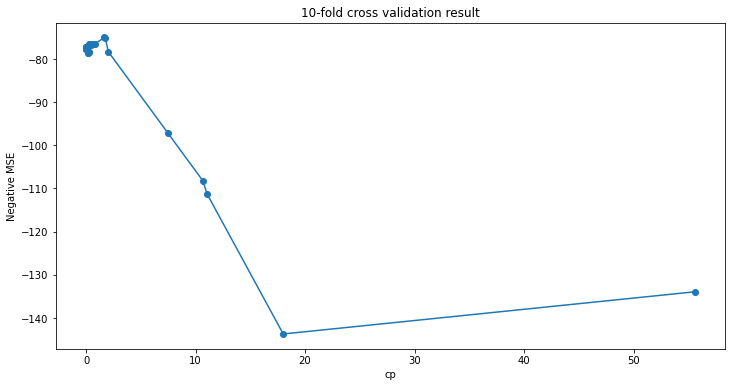

In [91]:
plt.figure(figsize=(12,6))
plt.plot(alphas,cv_score,marker='o')
plt.title('10-fold cross validation result')
plt.xlabel('cp')
plt.ylabel('Negative MSE')

In [99]:
print("The optimal value of alpha is",alphas[np.argmax(cv_score)])

The optimal value of alpha is 1.6579252083333358


In [96]:
tree2 = DecisionTreeRegressor(random_state=13, 
                              ccp_alpha = alphas[np.argmax(cv_score)])
# This builds the tree based on the optimal alpha level previoulsy determined
tree2.fit(x_train, y_train)
pred_test = tree2.predict(x_test)
print("MSE:",mean_squared_error(pred_test,y_test))

MSE: 65.11687364141413


# Logistic Regression Tree Question 1

In [140]:
bankruptcy = pd.read_csv("/Users/brandonk87/Downloads/MSC 641/Tree Methods/bankruptcy.csv")
bankruptcy.head()

,FYEAR,DLRSN,CUSIP,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10
0,1999,0,36020,0.307139,0.887006,1.647681,-0.199158,1.092964,-0.313289,-0.196793,1.206763,0.282471,0.158896
1,1999,0,36110,0.760736,0.592493,0.453003,-0.369890,0.186154,0.039619,0.327497,0.428418,1.106965,0.793443
2,1999,0,37520,-0.513596,0.337615,0.299015,-0.029080,-0.432605,0.829993,-0.707786,0.476153,2.179175,2.484584
3,1994,1,78110,-0.466129,0.370747,0.496067,-0.373429,-0.267424,0.977799,-0.610975,0.456810,0.151951,0.047789
4,1999,0,00079X10,2.023422,0.214876,0.182595,6.695360,-1.148338,-1.505889,2.876477,0.287375,-0.986442,0.791077


In [141]:
y = bankruptcy[["DLRSN"]]
x = bankruptcy.iloc[:,3:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 13)

# Question 2

In [142]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=13)
tree.fit(x_train, y_train)

pred_train = tree.predict(x_train)
print("Train accuracy:",metrics.accuracy_score(pred_train,y_train))

pred_test = tree.predict(x_test)
print("Test accuracy:",metrics.accuracy_score(pred_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.8419117647058824


In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("The MR is:",(FP + FN)/len(y_test))

[[855  75]
 [ 97  61]]
The FNR is: 0.5514705882352942
The FPR is: 0.10189075630252101
The MR is: 0.15808823529411764


AUC: 0.6527153940383831


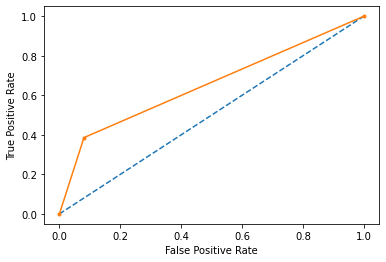

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score
pred_test_prob = tree.predict_proba(x_test)
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test_prob[:,1])
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC:",metrics.auc(lr_fpr, lr_tpr))

# Question 3

In [145]:
tree = DecisionTreeClassifier(random_state=13)
path = tree.cost_complexity_pruning_path(x_train,y_train)
alphas, impurities = path.ccp_alphas, path.impurities
cv_score = []
for i in alphas:
    tree = DecisionTreeClassifier(random_state=13, ccp_alpha = i)
    cv = cross_val_score(tree, x_train, y_train, cv=10, scoring = 'accuracy')
    cv_score.append(np.mean(cv))

Text(0, 0.5, 'Accuracy')

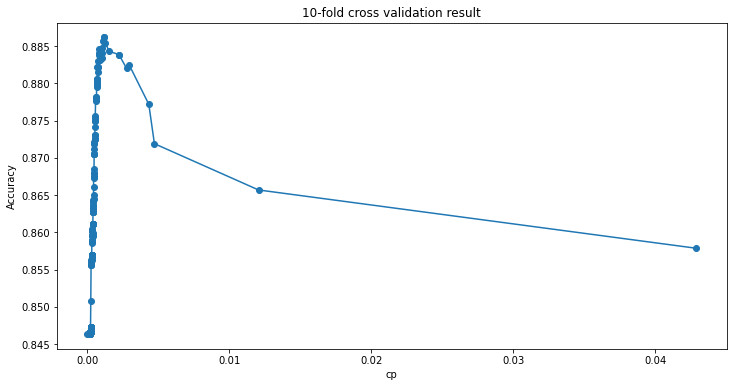

In [146]:
plt.figure(figsize=(12,6))
plt.plot(alphas,cv_score,marker='o')
plt.title('10-fold cross validation result')
plt.xlabel('cp')
plt.ylabel('Accuracy')

In [147]:
print("The optimal value of alpha is",alphas[np.argmax(cv_score)])

The optimal value of alpha is 0.0011513229946992602


In [148]:
tree = DecisionTreeClassifier(random_state=13, ccp_alpha = alphas[np.argmax(cv_score)])
tree.fit(x_train, y_train)
pred_test = tree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(pred_test,y_test))

Accuracy: 0.8814338235294118


In [149]:
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("The MR is:",(FP + FN)/len(y_test))

[[904  26]
 [103  55]]
The FNR is: 0.32098765432098764
The FPR is: 0.10228401191658391
The MR is: 0.11856617647058823


AUC: 0.8599700558050906


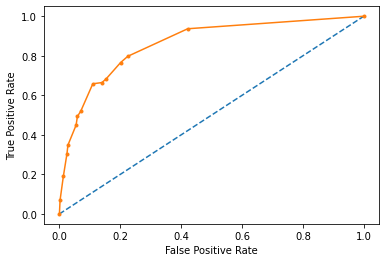

In [150]:
pred_test_prob = tree.predict_proba(x_test)
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test_prob[:,1])
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC:",metrics.auc(lr_fpr, lr_tpr))

# Question 4

In [158]:
import statsmodels.api as sm
lr = sm.Logit(y_train, sm.add_constant(x_train)).fit()
pred_test = lr.predict(sm.add_constant(x_test))
pred_test = round(pred_test)

Optimization terminated successfully.
         Current function value: 0.276930
         Iterations 9


In [161]:
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print("Accuracy:",metrics.accuracy_score(pred_test,y_test))
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("The MR is:",(FP + FN)/len(y_test))

Accuracy: 0.8915441176470589
[[907  23]
 [ 95  63]]
The FNR is: 0.26744186046511625
The FPR is: 0.09481037924151696
The MR is: 0.10845588235294118


AUC: 0.6870014972097455


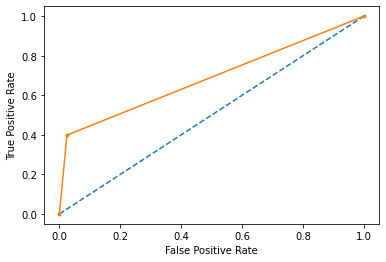

In [163]:
pred_test = lr.predict(sm.add_constant(x_test))
pred_test_prob = round(pred_test)
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test_prob)
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC:",metrics.auc(lr_fpr, lr_tpr))